<a href="https://colab.research.google.com/github/harshilanand/Classifying-Cats-and-Dogs-Images/blob/main/Spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [5]:
data_path = "/content/emails.csv"
message_dataset = pd.read_csv(data_path, engine='python', encoding='utf-8', error_bad_lines=False)
message_dataset.head()


<ipython-input-5-cd4a4d34b3e2>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  message_dataset = pd.read_csv(data_path, engine='python', encoding='utf-8', error_bad_lines=False)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
message_dataset.shape

(5728, 2)

<Axes: ylabel='spam'>

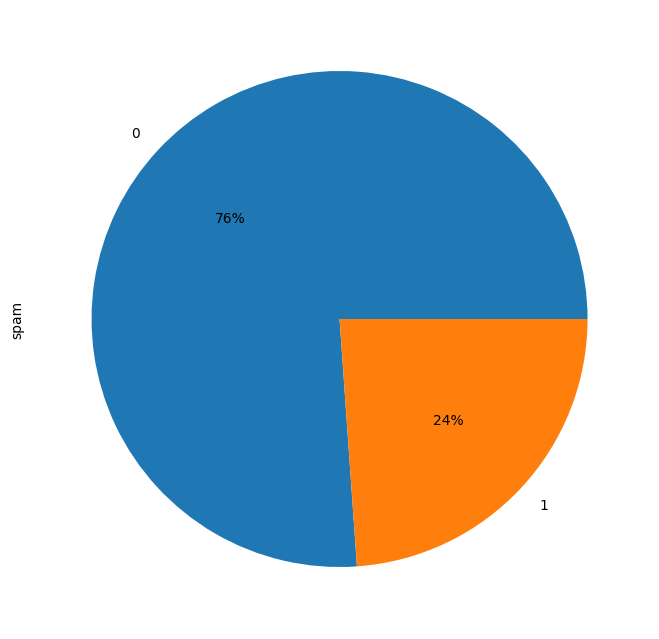

In [7]:
plt.rcParams["figure.figsize"] = [8,10]
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%' )

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
message_dataset['text_without_sw' ]=message_dataset['text'].apply(lambda x:''.join([item for item in x.split() if item not in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


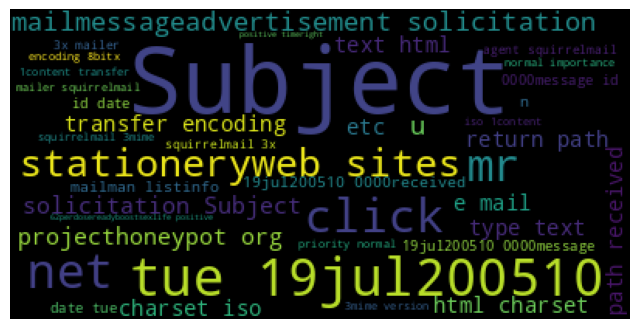

In [9]:
message_dataset_spam = message_dataset[message_dataset["spam"] == 1]
plt.rcParams["figure.figsize" ] = [8,10]
text = ''.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [10]:
X = message_dataset["text" ]
y = message_dataset["spam"]

In [11]:
import re

def clean_text(doc):
    # Remove non-alphabetical characters
    document = re.sub('[^a-zA-Z]', '', doc)

    # Remove spaces around alphabetical characters
    document = re.sub(r'\s+([a-zA-Z])\s+', r'\1', document)

    # Remove extra whitespace
    document = re.sub(r'\s+', ' ', document)

    return document

In [12]:
X_sentences = []
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = spam_detector.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (accuracy_score(y_test,y_pred))

[[856   0]
 [290   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       856
           1       0.00      0.00      0.00       290

    accuracy                           0.75      1146
   macro avg       0.37      0.50      0.43      1146
weighted avg       0.56      0.75      0.64      1146

0.7469458987783595


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print (X_sentences[56])
print (y[56])

Subjectlocalizedsoftwarealllanguagesavailablehellowewouldliketoofferlocalizedsoftwareversionsgermanfrenchspanishukandmanyothersaiiiistedsoftwareisavailableforimmediatedownioadnoneedtowaitweekforcddeiiveryjustfewexampiesnortonlnternetsecurityprowindowsxpprofessionaiwithspfuilversioncoreidrawgraphicssuitedreamweavermxhomesiteinciudinqmacromediastudiomxjustbrowseoursiteandfindanysoftwareyouneedinyournativeianguaqebestreqardskayieen
1


In [ ]:
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))